In [1]:
#env:freecad_fem_env_meshlab / new: freecad_gym
%matplotlib inline
import ctypes
libgcc_s = ctypes.CDLL('libgcc_s.so.1')
import gym 
from RLFEM import *
from termcolor import colored

ccxtools_import_passed...


In [2]:
env = RLFEM(render_modes='human',
            save_path = 'meshsave_tmp/',
            loaded_mesh_path = 'data/',
            loaded_mesh_filename = 'Fcad22_ver1.obj',
            gt_mesh_path = '../../scripts/data/_20221213121013416030.obj',
            view_meshes=True,
            xls_pth= 'data/',
            xls_filename='state_actions_2023.xlsx',
            load_3d=True)


 ******* Fcad22_ver1.obj is loaded ******* 

     +++ Mesh is healthy!  +++ 
mesh_OK:True
shape bounding box: BoundBox (-1e-06, 0, 0, 10, 3, 2)
shape result mesh is removed...
mesh result mesh is removed...
+ . + . + . + . observation_image_size:3795
FemConstraints cleared...
old solid result mesh is removed...

 ******* Fcad22_ver1.obj is loaded ******* 

     +++ Mesh is healthy!  +++ 
mesh_OK:True
shape bounding box: BoundBox (-1e-06, 0, 0, 10, 3, 2)
shape result mesh is removed...
mesh result mesh is removed...
step no:0
+ . + . + . + . observation_image_size:3795


/work/aifa/miniconda3/envs/freecad_gym/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


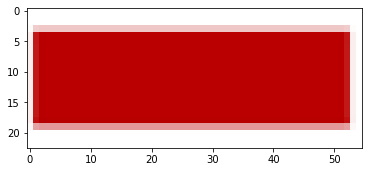

FemConstraints cleared...
old solid result mesh is removed...

 ******* Fcad22_ver1.obj is loaded ******* 

     +++ Mesh is healthy!  +++ 
mesh_OK:True
shape bounding box: BoundBox (-1e-06, 0, 0, 10, 3, 2)
shape result mesh is removed...
mesh result mesh is removed...
step no:0
+ . + . + . + . observation_image_size:3795


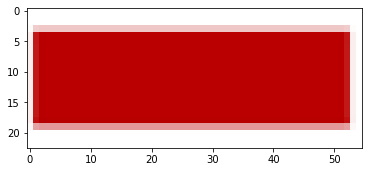

force position : 7.724441051483154

femmesh created from shape
num of faces as fixed constraints: 88
num of faces as force constraints: 49
force const done!
=o=o=o=o= INP FILE PATH: /tmp/femrqqx9wes/FEMMeshNetgen.inp
Analysis done successfully...
.....................................fem_volume:True
CCX_Results
Mesh by surface search method:  0.19109599999999993
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_7.724441051483154_1080269.8135375977
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/femrqqx9wes/FEMMeshNetgen.inp
step_no- th:1
reward:0.780021484527474
+ . + . + . + . observation_image_size:3795


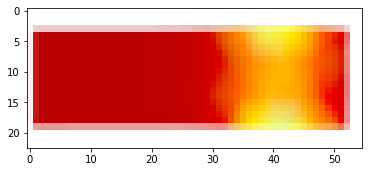

force position : 6.314999580383301

femmesh created from shape
num of faces as fixed constraints: 26
num of faces as force constraints: 36
force const done!
shape result mesh is removed...
mesh result mesh is removed...
=o=o=o=o= INP FILE PATH: /tmp/femf2ieq14i/FEMMeshNetgen.inp
Analysis done successfully...
.....................................fem_volume:True
CCX_Results
Mesh by surface search method:  0.43708300000000033
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_6.314999580383301_673246.7651367188
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/femf2ieq14i/FEMMeshNetgen.inp
step_no- th:2
reward:0.790197657547092
+ . + . + . + . observation_image_size:3795


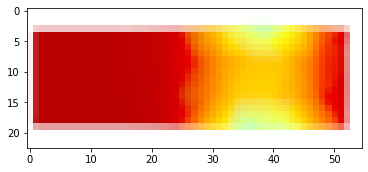

force position : 2.6980338096618652

femmesh created from shape
num of faces as fixed constraints: 35
num of faces as force constraints: 45
force const done!
shape result mesh is removed...
mesh result mesh is removed...
=o=o=o=o= INP FILE PATH: /tmp/femrfivdym3/FEMMeshNetgen.inp
Analysis done successfully...
.....................................fem_volume:True
CCX_Results
Mesh by surface search method:  0.8886620000000001
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_2.6980338096618652_831124.4010925293
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/femrfivdym3/FEMMeshNetgen.inp
step_no- th:3
reward:0.2802997477621616
+ . + . + . + . observation_image_size:3795
= = = = Episode:1 Score:1.8505188898367277
FemConstraints cleared...
old solid result mesh is removed...
removed:

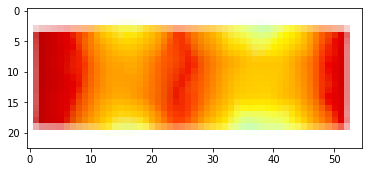

force position : 5.819425106048584

femmesh created from shape
num of faces as fixed constraints: 88
num of faces as force constraints: 44
force const done!
=o=o=o=o= INP FILE PATH: /tmp/fem5k3p1z8q/FEMMeshNetgen.inp
Analysis done successfully...
.....................................fem_volume:True
CCX_Results
Mesh by surface search method:  0.226522000000001
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_5.819425106048584_1455811.9773864746
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/fem5k3p1z8q/FEMMeshNetgen.inp
step_no- th:1
reward:0.9473287487364969
+ . + . + . + . observation_image_size:3795


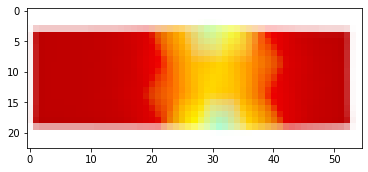

force position : 7.606534481048584

femmesh created from shape
num of faces as fixed constraints: 25
num of faces as force constraints: 44
force const done!
shape result mesh is removed...
mesh result mesh is removed...
=o=o=o=o= INP FILE PATH: /tmp/fem8g4rqfe8/FEMMeshNetgen.inp
Analysis done successfully...
.....................................fem_volume:True
CCX_Results
Mesh by surface search method:  0.46929599999999994
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_7.606534481048584_583840.7039642334
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/fem8g4rqfe8/FEMMeshNetgen.inp
step_no- th:2
reward:0.9246166638523077
+ . + . + . + . observation_image_size:3795


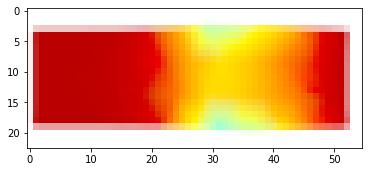

force position : 4.561298370361328

femmesh created from shape
num of faces as fixed constraints: 37
num of faces as force constraints: 91
force const done!
shape result mesh is removed...
mesh result mesh is removed...
problem occurred! FEM mesh has no volume elements, either define a shell thicknesses or provide a FEM mesh with volume elements.


.....................................fem_volume:False
fem_volume is not OK...
CCX_Results
Mesh by surface search method:  0.19452400000000125
mesh_out is converted to mesh...
     +++ Mesh is healthy!  +++ 
state_info : Fcad22_ver1_4.561298370361328_576086.4734649658
=============921600
+=+=++=+=+=+=+=+= observation_image_size:3795
old femmesh is removed...
FemConstraints cleared...
old solid result mesh is removed...
shape from mesh done...
converted to solid...
=o=o=o=o=o=o=o/tmp/fem8g4rqfe8/FEMMeshNetgen.inp
step_no- th:3
reward:0.2563289262422088
+ . + . + . + . observation_image_size:3795
= = = = Episode:2 Score:2.1282743388310132
Done!

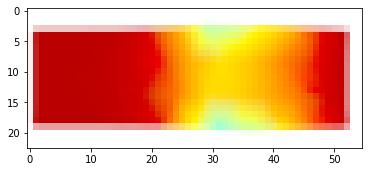

In [3]:
import pylab as pl
from IPython import display
pl.clf()
pl.imshow(env.render())
display.display(pl.gcf())
# display.clear_output(wait=True)

episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        obs = env.render()
        
        # pl.clf()
        pl.imshow(obs)  
        display.display(pl.gcf())
        # display.clear_output(wait=True)
        
        action = env.action_space.sample()
        observation, reward, done, _ = env.step(action)
        score+=reward
    print(colored(f'= = = = Episode:{episode} Score:{score}','green'))

env.close()
print(colored('Done!','red'))